In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
# import folium
# import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

In [40]:
df = pd.read_csv('mitre_attack.csv')

In [41]:
df.head()

,CVE_ID,PublishTime,ModifyTime,Report,CVSSV3,AttackVector,AttackComplexity,PrivilegesRequired,UserInteraction,Scope,ConfidentialityImpact,IntegrityImpact,AvailabilityImpact
0,CVE-1999-0199,2020-10-06T13:15Z,2020-12-03T16:52Z,manual/search.texi in the GNU C Library (aka g...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
1,CVE-1999-0236,1997-01-01T05:00Z,2022-08-17T07:15Z,ScriptAlias directory in NCSA and Apache httpd...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
2,CVE-1999-0239,1998-01-01T05:00Z,2024-02-02T02:16Z,Netscape FastTrack Web server lists files when...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
3,CVE-1999-0426,1999-03-01T05:00Z,2024-02-08T15:50Z,The default permissions of /dev/kmem in Linux ...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
4,CVE-1999-0783,1998-06-16T04:00Z,2024-01-26T16:54Z,FreeBSD allows local users to conduct a denial...,5.5,LOCAL,LOW,LOW,NONE,UNCHANGED,NONE,NONE,HIGH


In [42]:

df.shape

(150260, 13)

In [43]:
df.describe()

,CVSSV3
count,150260.000000
mean,7.189864
std,1.675796
min,1.800000
25%,5.900000
50%,7.500000
75%,8.800000
max,10.000000


In [44]:
df = df.rename(columns=lambda x: x.lower())

In [45]:
df.head()

,cve_id,publishtime,modifytime,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact
0,CVE-1999-0199,2020-10-06T13:15Z,2020-12-03T16:52Z,manual/search.texi in the GNU C Library (aka g...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
1,CVE-1999-0236,1997-01-01T05:00Z,2022-08-17T07:15Z,ScriptAlias directory in NCSA and Apache httpd...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
2,CVE-1999-0239,1998-01-01T05:00Z,2024-02-02T02:16Z,Netscape FastTrack Web server lists files when...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
3,CVE-1999-0426,1999-03-01T05:00Z,2024-02-08T15:50Z,The default permissions of /dev/kmem in Linux ...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
4,CVE-1999-0783,1998-06-16T04:00Z,2024-01-26T16:54Z,FreeBSD allows local users to conduct a denial...,5.5,LOCAL,LOW,LOW,NONE,UNCHANGED,NONE,NONE,HIGH


In [46]:
missing_values_sum = df.isnull().sum()
missing_values_sum

cve_id                   0
publishtime              0
modifytime               0
report                   0
cvssv3                   0
attackvector             0
attackcomplexity         0
privilegesrequired       0
userinteraction          0
scope                    0
confidentialityimpact    0
integrityimpact          0
availabilityimpact       0
dtype: int64

In [47]:
df['publishtime'] = pd.to_datetime(df['publishtime'])
df['modifytime'] = pd.to_datetime(df['modifytime'])

df['attackvector'] = df['attackvector'].str.upper()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150260 entries, 0 to 150259
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   cve_id                 150260 non-null  object             
 1   publishtime            150260 non-null  datetime64[ns, UTC]
 2   modifytime             150260 non-null  datetime64[ns, UTC]
 3   report                 150260 non-null  object             
 4   cvssv3                 150260 non-null  float64            
 5   attackvector           150260 non-null  object             
 6   attackcomplexity       150260 non-null  object             
 7   privilegesrequired     150260 non-null  object             
 8   userinteraction        150260 non-null  object             
 9   scope                  150260 non-null  object             
 10  confidentialityimpact  150260 non-null  object             
 11  integrityimpact        150260 non-null 

In [48]:
df.head()

,cve_id,publishtime,modifytime,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact
0,CVE-1999-0199,2020-10-06 13:15:00+00:00,2020-12-03 16:52:00+00:00,manual/search.texi in the GNU C Library (aka g...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
1,CVE-1999-0236,1997-01-01 05:00:00+00:00,2022-08-17 07:15:00+00:00,ScriptAlias directory in NCSA and Apache httpd...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
2,CVE-1999-0239,1998-01-01 05:00:00+00:00,2024-02-02 02:16:00+00:00,Netscape FastTrack Web server lists files when...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE
3,CVE-1999-0426,1999-03-01 05:00:00+00:00,2024-02-08 15:50:00+00:00,The default permissions of /dev/kmem in Linux ...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH
4,CVE-1999-0783,1998-06-16 04:00:00+00:00,2024-01-26 16:54:00+00:00,FreeBSD allows local users to conduct a denial...,5.5,LOCAL,LOW,LOW,NONE,UNCHANGED,NONE,NONE,HIGH


In [49]:
df = df.drop(['publishtime', 'modifytime'], axis=1)

In [50]:
df['Year'] = df['cve_id'].str[4:8]
df['ID'] = df['cve_id'].str[9:13]
df.head()

,cve_id,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact,Year,ID
0,CVE-1999-0199,manual/search.texi in the GNU C Library (aka g...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,1999,0199
1,CVE-1999-0236,ScriptAlias directory in NCSA and Apache httpd...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,1999,0236
2,CVE-1999-0239,Netscape FastTrack Web server lists files when...,7.5,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,1999,0239
3,CVE-1999-0426,The default permissions of /dev/kmem in Linux ...,9.8,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,1999,0426
4,CVE-1999-0783,FreeBSD allows local users to conduct a denial...,5.5,LOCAL,LOW,LOW,NONE,UNCHANGED,NONE,NONE,HIGH,1999,0783


In [51]:
df = df.reindex(columns=df.columns[-2:].tolist() + df.columns[:-2].tolist())

In [52]:
df.drop(['cve_id'], axis=1, inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns[4:]:
    df[column] = label_encoder.fit_transform(df[column])

In [54]:

df.head()

,Year,ID,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact
0,1999,0199,manual/search.texi in the GNU C Library (aka g...,9.8,2,1,2,0,1,0,0,0
1,1999,0236,ScriptAlias directory in NCSA and Apache httpd...,7.5,2,1,2,0,1,0,2,2
2,1999,0239,Netscape FastTrack Web server lists files when...,7.5,2,1,2,0,1,0,2,2
3,1999,0426,The default permissions of /dev/kmem in Linux ...,9.8,2,1,2,0,1,0,0,0
4,1999,0783,FreeBSD allows local users to conduct a denial...,5.5,1,1,1,0,1,2,2,0


In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'cvssv3' is the target variable
features = df.drop(columns=['cvssv3', 'Year', 'ID', 'report'])
target = df['cvssv3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)

# Display the importances
print(importances)


integrityimpact          0.530847
confidentialityimpact    0.122332
privilegesrequired       0.116479
attackvector             0.096348
availabilityimpact       0.038265
userinteraction          0.037544
attackcomplexity         0.033073
scope                    0.025112
dtype: float64


In [56]:
numerical_columns = df.select_dtypes(include=['float64', 'int32']).columns
unique_counts = df[numerical_columns].nunique()
print(unique_counts)

cvssv3                   80
attackvector              4
attackcomplexity          2
privilegesrequired        3
userinteraction           2
scope                     2
confidentialityimpact     3
integrityimpact           3
availabilityimpact        3
dtype: int64


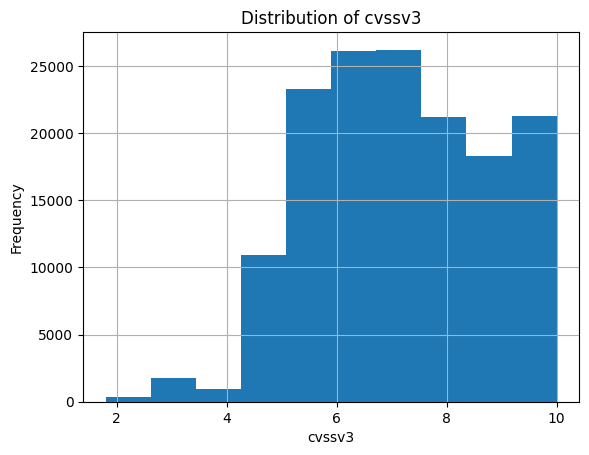

In [57]:
df['cvssv3'].hist()
plt.xlabel('cvssv3')
plt.ylabel('Frequency')
plt.title('Distribution of cvssv3')
plt.show()

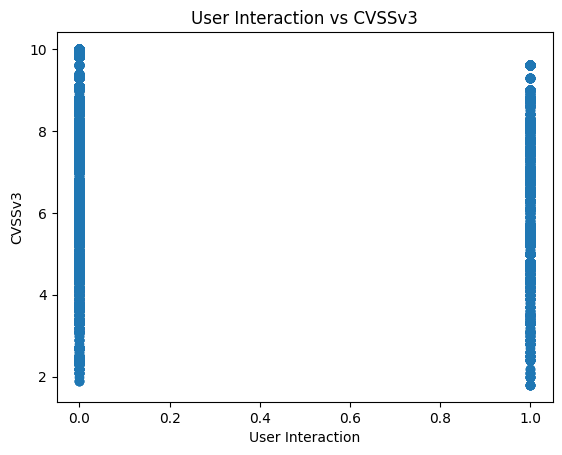

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df['userinteraction'], df['cvssv3'])
plt.xlabel('User Interaction')
plt.ylabel('CVSSv3')
plt.title('User Interaction vs CVSSv3')
plt.show()

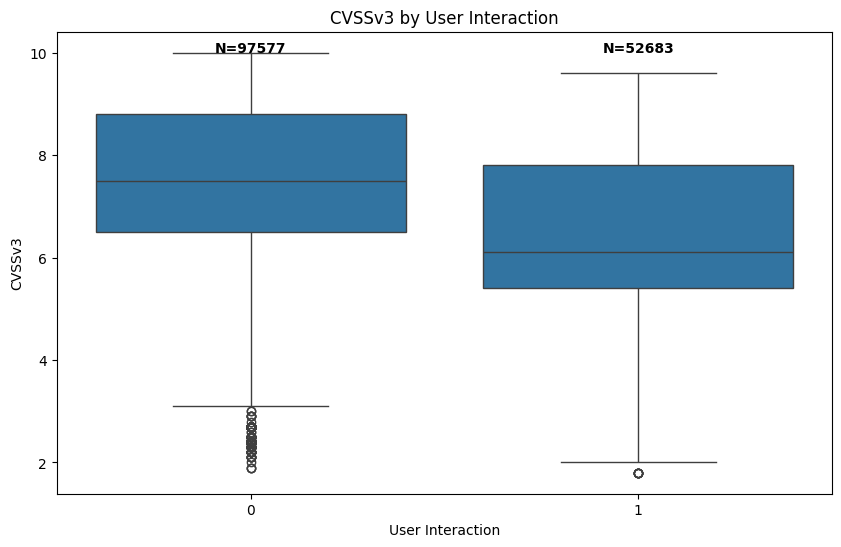

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['userinteraction'].value_counts()
plt.figure(figsize=(10, 6))
sns.boxplot(x='userinteraction', y='cvssv3', data=df)
plt.xlabel('User Interaction')
plt.ylabel('CVSSv3')
plt.title('CVSSv3 by User Interaction')

for i, count in enumerate(class_counts):
    plt.text(i, df['cvssv3'].max(), f'N={count}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

# Algorithm Development

In [60]:
# Calculate the complexity score using feature importances
df['complexity_score'] = (
    0.53 * df['integrityimpact'] +
    0.12 * df['confidentialityimpact'] +
    0.12 * df['privilegesrequired'] +
    0.10 * df['attackvector'] +
    0.04 * df['availabilityimpact'] +
    0.04 * df['userinteraction'] +
    0.03 * df['attackcomplexity'] +
    0.03 * df['scope']
)

# Display the first few rows with the new complexity score
df[['ID', 'complexity_score']].head()


,ID,complexity_score
0,0199,0.50
1,0236,1.64
2,0239,1.64
3,0426,0.50
4,0783,1.58


##  Define Prevalence Metrics

In [61]:
# Calculate the prevalence score using feature importances and existing structure
df['prevalence_score'] = (
    df.groupby('ID')['ID'].transform('count') * (
        0.53 * df['integrityimpact'] +
        0.12 * df['confidentialityimpact'] +
        0.12 * df['privilegesrequired'] +
        0.10 * df['attackvector'] +
        0.04 * df['availabilityimpact'] +
        0.04 * df['userinteraction'] +
        0.03 * df['attackcomplexity'] +
        0.03 * df['scope'].apply(lambda x: 1 if x == 0 else 2)
    )
)

# Display the first few rows with the new prevalence score
df[['ID', 'prevalence_score']].head()


,ID,prevalence_score
0,0199,5.83
1,0236,13.36
2,0239,10.02
3,0426,3.71
4,0783,14.49


 ## Calculate Final Threat Actor Score

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Calculate the final score as the average of complexity and prevalence scores
df['final_score'] = (df['complexity_score'] + df['prevalence_score']) / 2

# Normalize the final score using MinMaxScaler
scaler = MinMaxScaler()
df['final_score_normalized'] = scaler.fit_transform(df[['final_score']])

# Display the first few rows with the final score and normalized final score
df[['ID', 'final_score', 'final_score_normalized']].head()


,ID,final_score,final_score_normalized
0,0199,3.165,0.003111
1,0236,7.500,0.007477
2,0239,5.830,0.005795
3,0426,2.105,0.002044
4,0783,8.035,0.008015


In [63]:
df.head()

,Year,ID,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact,complexity_score,prevalence_score,final_score,final_score_normalized
0,1999,0199,manual/search.texi in the GNU C Library (aka g...,9.8,2,1,2,0,1,0,0,0,0.50,5.83,3.165,0.003111
1,1999,0236,ScriptAlias directory in NCSA and Apache httpd...,7.5,2,1,2,0,1,0,2,2,1.64,13.36,7.500,0.007477
2,1999,0239,Netscape FastTrack Web server lists files when...,7.5,2,1,2,0,1,0,2,2,1.64,10.02,5.830,0.005795
3,1999,0426,The default permissions of /dev/kmem in Linux ...,9.8,2,1,2,0,1,0,0,0,0.50,3.71,2.105,0.002044
4,1999,0783,FreeBSD allows local users to conduct a denial...,5.5,1,1,1,0,1,2,2,0,1.58,14.49,8.035,0.008015


In [64]:
df.rename(columns={'final_score_normalized': 'threat_score_normalized'}, inplace=True)
df.rename(columns={'final_score': 'threat_score'}, inplace=True)

df.head()

,Year,ID,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact,complexity_score,prevalence_score,threat_score,threat_score_normalized
0,1999,0199,manual/search.texi in the GNU C Library (aka g...,9.8,2,1,2,0,1,0,0,0,0.50,5.83,3.165,0.003111
1,1999,0236,ScriptAlias directory in NCSA and Apache httpd...,7.5,2,1,2,0,1,0,2,2,1.64,13.36,7.500,0.007477
2,1999,0239,Netscape FastTrack Web server lists files when...,7.5,2,1,2,0,1,0,2,2,1.64,10.02,5.830,0.005795
3,1999,0426,The default permissions of /dev/kmem in Linux ...,9.8,2,1,2,0,1,0,0,0,0.50,3.71,2.105,0.002044
4,1999,0783,FreeBSD allows local users to conduct a denial...,5.5,1,1,1,0,1,2,2,0,1.58,14.49,8.035,0.008015


In [65]:
df['final_threat_score'] = pd.cut(df['threat_score_normalized'], bins=10, labels=range(1, 11))

In [66]:
df.head(1)

,Year,ID,report,cvssv3,attackvector,attackcomplexity,privilegesrequired,userinteraction,scope,confidentialityimpact,integrityimpact,availabilityimpact,complexity_score,prevalence_score,threat_score,threat_score_normalized,final_threat_score
0,1999,0199,manual/search.texi in the GNU C Library (aka g...,9.8,2,1,2,0,1,0,0,0,0.5,5.83,3.165,0.003111,1


In [67]:
total_rows = len(df)
total_unique_ids = df['ID'].nunique()

print("Total Rows:", total_rows)
print("Total Unique IDs:", total_unique_ids)

Total Rows: 150260
Total Unique IDs: 9997


In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate, Input
from tensorflow.keras.models import Model
import re

In [69]:
# Text preprocessing function (example)
def preprocess_text(text):
    # Implement your text preprocessing steps here
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [70]:
df_copy = df
# Apply text preprocessing
df_copy['report'] = df_copy['report'].apply(preprocess_text)

# Normalize the scores
scaler = MinMaxScaler()
df_copy[['threat_score', 'complexity_score', 'prevalence_score']] = scaler.fit_transform(df[['threat_score', 'complexity_score', 'prevalence_score']])


In [71]:
# Tokenize the 'report' column
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_copy['report'])
sequences = tokenizer.texts_to_sequences(df_copy['report'])
padded_sequences = pad_sequences(sequences, maxlen=100)


In [72]:
# Prepare input data
X_text = padded_sequences
X_scores = df_copy[['complexity_score', 'prevalence_score']].values
y = df_copy['threat_score'].values

In [74]:
# Define the LSTM model
input_text = Input(shape=(100,))
embedding = Embedding(input_dim=5000, output_dim=128)(input_text)
lstm = LSTM(64)(embedding)

input_scores = Input(shape=(2,))
concat = Concatenate()([lstm, input_scores])

output = Dense(1, activation='linear')(concat)

model = Model(inputs=[input_text, input_scores], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([X_text, X_scores], y, epochs=20, batch_size=32, validation_split=0.2)

# Save the model
model.save('lstm_threat_model.h5')

Epoch 1/20
3757/3757 [==============================] - 175s 46ms/step - loss: 4.8625e-04 - val_loss: 1.3625e-06
Epoch 2/20
3757/3757 [==============================] - 164s 44ms/step - loss: 8.7815e-07 - val_loss: 1.7937e-07
Epoch 3/20
3757/3757 [==============================] - 184s 49ms/step - loss: 1.1746e-07 - val_loss: 5.3950e-08
Epoch 4/20
3757/3757 [==============================] - 162s 43ms/step - loss: 8.1764e-08 - val_loss: 4.4568e-08
Epoch 5/20
3757/3757 [==============================] - 176s 47ms/step - loss: 5.0347e-08 - val_loss: 3.3259e-08
Epoch 6/20
3757/3757 [==============================] - 154s 41ms/step - loss: 2.7339e-08 - val_loss: 6.9734e-09
Epoch 7/20
3757/3757 [==============================] - 160s 43ms/step - loss: 1.8075e-08 - val_loss: 1.0339e-09
Epoch 8/20
3757/3757 [==============================] - 156s 42ms/step - loss: 1.0612e-08 - val_loss: 4.2549e-10
Epoch 9/20
3757/3757 [==============================] - 156s 42ms/step - loss: 1.0954e-08 - val_

c:\Users\mfurq\anaconda3\envs\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
import re
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
model = load_model('lstm_threat_model.h5')

# Example new input values
new_report = "This is a new report text that needs to be preprocessed."
new_complexity_score = 0.7
new_prevalence_score = 0.5

# Text preprocessing function (same as used during training)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess the new report text
new_report = preprocess_text(new_report)

# Tokenize and pad the new report text
tokenizer = Tokenizer(num_words=5000)
# Assuming the tokenizer was fitted on the training data
tokenizer.fit_on_texts(df_copy['report'])  # Use the same tokenizer as during training
new_sequence = tokenizer.texts_to_sequences([new_report])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100)

# Normalize the new input scores
scaler = MinMaxScaler()
# Assuming the scaler was fitted on the training data
scaler.fit(df_copy[['complexity_score', 'prevalence_score']])  # Use the same scaler as during training
new_scores = scaler.transform([[new_complexity_score, new_prevalence_score]])

# Prepare the input data for the model
X_text_new = new_padded_sequence
X_scores_new = new_scores

# Make the prediction
predicted_threat_score = model.predict([X_text_new, X_scores_new])

print("Predicted Threat Score:", predicted_threat_score[0][0])

c:\Users\mfurq\anaconda3\envs\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 399ms/step
Predicted Threat Score: 0.5002219
